In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from helper_functions import *
from CNN import get_CNN_model

if tf.config.list_physical_devices('GPU'):
  print("GPU is available")
else:
  print("GPU is not available")

2025-01-05 16:11:37.792641: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-05 16:11:37.802727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736089897.814697   19360 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736089897.818090   19360 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 16:11:37.830951: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

GPU is available


In [2]:
# Load data
X, y = load_data()
X.shape, y.shape

Data is loaded.


((639, 240, 240, 3), (639, 1))

# We can see class imbalance

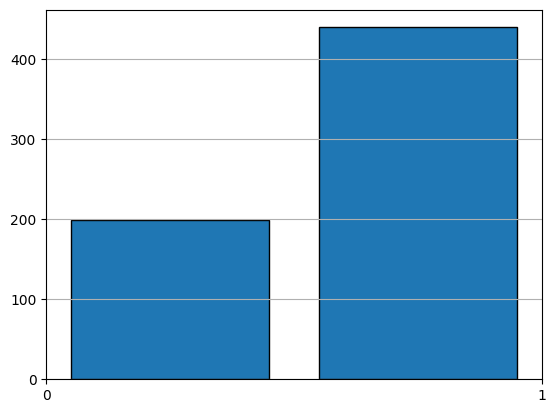

In [3]:
plt.hist(y, bins=2, edgecolor='black', align='mid', rwidth=0.8)
plt.grid(True, axis='y')
plt.xticks([0, 1])
plt.show()

I0000 00:00:1736089901.768439   19360 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5636 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Data shapes: (511, 240, 240, 3), (511, 1)


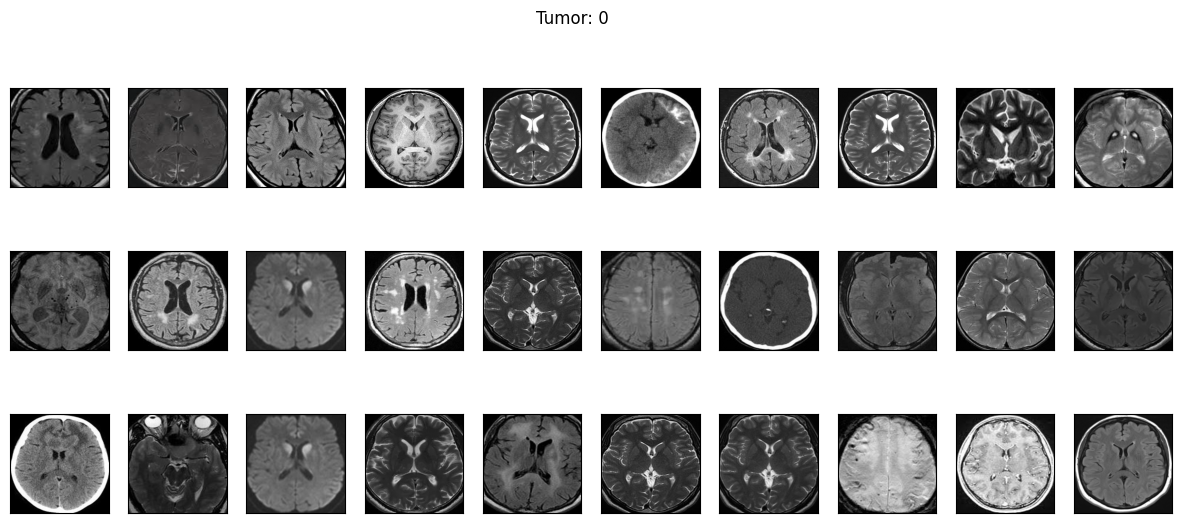

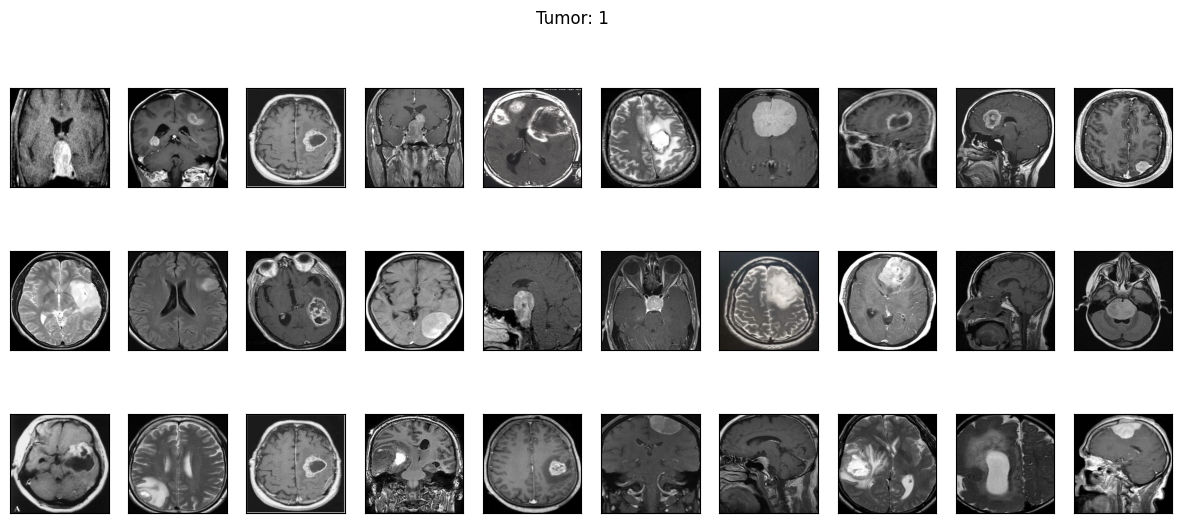

Model info:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 234, 234, 128)  │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 117, 117, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 117, 117, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 64)   │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,593 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,313 (2.77 MB)

 Trainable params: 724,737 (2.76 MB)

 Non-trainable params: 576 (2.25 KB)


Fitting the model...
Epoch 1/18


I0000 00:00:1736089904.393833   19458 service.cc:148] XLA service 0x7c637001fdd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736089904.393856   19458 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-01-05 16:11:44.428594: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736089904.528772   19458 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-05 16:11:48.720784: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6564 - loss: 3.4001

2025-01-05 16:12:10.689337: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[31,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-01-05 16:12:11.046448: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.35728015s
Trying algorithm eng0{} for conv (f32[31,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_back

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6554 - loss: 3.4512   

2025-01-05 16:12:30.935794: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-01-05 16:12:31.331799: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.396085084s
Trying algorithm eng0{} for conv (f32[32,64,111,111]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,117,117]{3,2,1,0}, f32[64,128,7,7]{3,2,1,0}, f32[64]{0}), window={size=7x7}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_bac

12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6546 - loss: 3.4944 - val_accuracy: 0.6641 - val_loss: 157.8729
Epoch 2/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.7293 - loss: 3.7104 - val_accuracy: 0.6641 - val_loss: 93.0393
Epoch 3/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.7188 - loss: 3.6262 - val_accuracy: 0.7031 - val_loss: 5.0653
Epoch 4/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.7819 - loss: 2.7113 - val_accuracy: 0.6562 - val_loss: 5.6170
Epoch 5/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.8768 - loss: 2.1733 - val_accuracy: 0.6797 - val_loss: 3.6485
Epoch 6/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.8700 - loss: 2.0100 - val_accuracy: 0.6172 - val_loss: 2.6089
Epoch 7/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9211 - loss: 1.6606 - val_accuracy: 0.6953 - val_loss: 1.8987
Epoch 8/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9559 - loss: 1.3923 - val_accuracy: 0.7578 - val

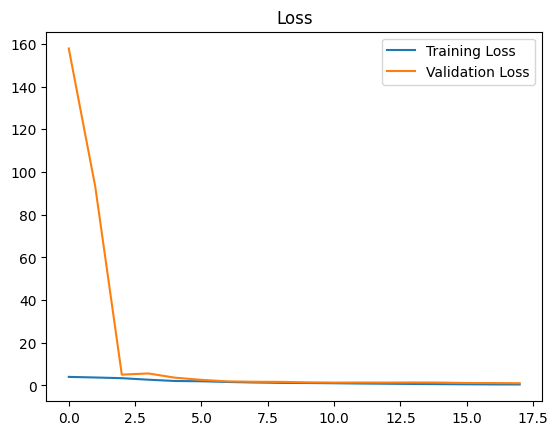

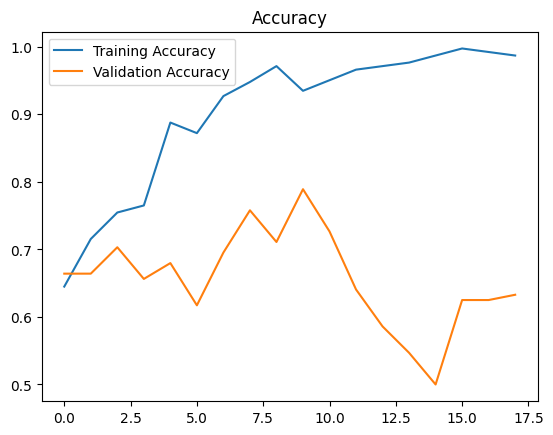

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
accuracy = 0.63
f1 score = 0.70


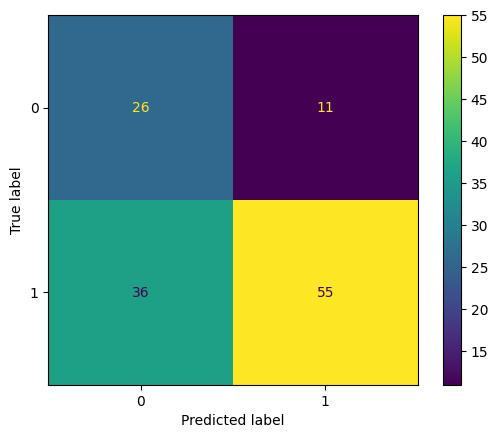

(0.6328125, np.float64(0.7006369426751592))

In [4]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.8)
m1 = get_CNN_model(optimizer, l2_reg=0.01)
train(m1, X_train, X_test, y_train, y_test, epochs=18, verbose=True, validation_split=0.25)

Data shapes: (511, 240, 240, 3), (511, 1)


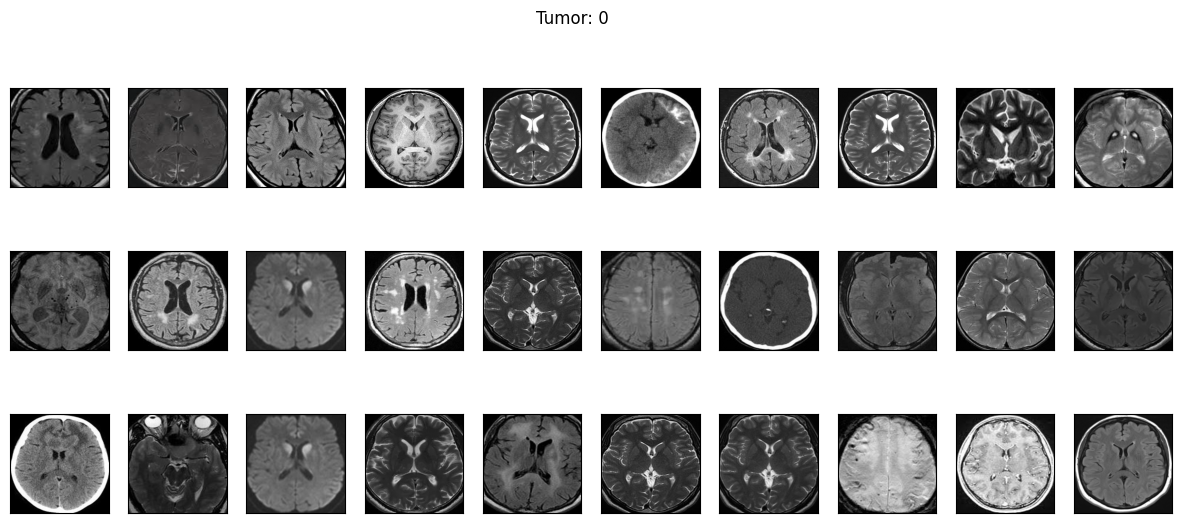

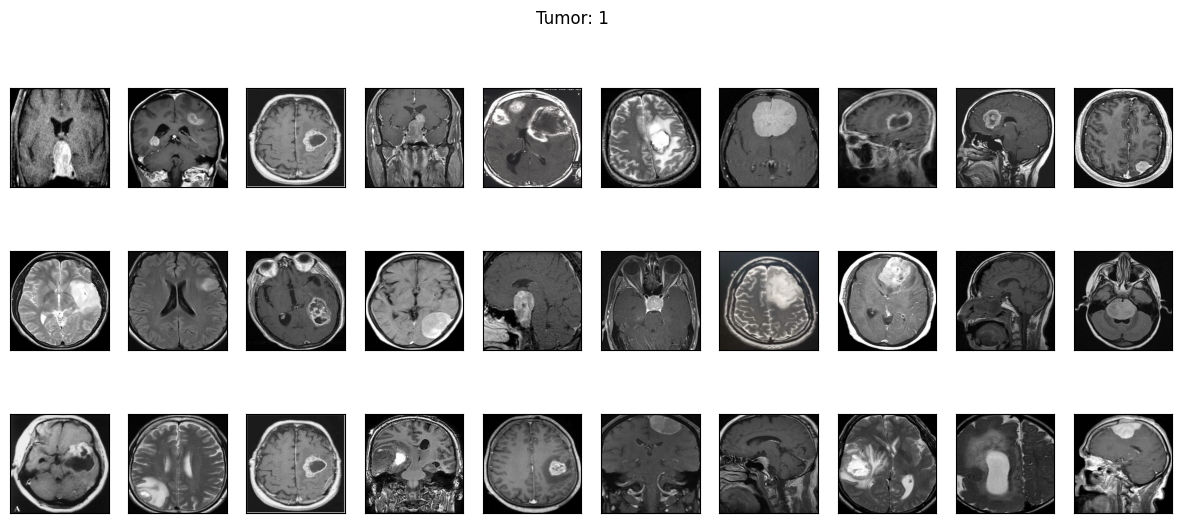

Model info:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 234, 234, 128)  │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 117, 117, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 117, 117, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 111, 111, 64)   │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 49, 49, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 32)     │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 9, 9, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,593 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,313 (2.77 MB)

 Trainable params: 724,737 (2.76 MB)

 Non-trainable params: 576 (2.25 KB)


Fitting the model...
Epoch 1/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.4956 - loss: 5.5047 - val_accuracy: 0.6641 - val_loss: 1879.4316 - learning_rate: 0.0500
Epoch 2/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.7511 - loss: 4.3397 - val_accuracy: 0.6641 - val_loss: 294.3727 - learning_rate: 0.0500
Epoch 3/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.7420 - loss: 4.2809 - val_accuracy: 0.6641 - val_loss: 38.4348 - learning_rate: 0.0500
Epoch 4/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.8287 - loss: 3.2992 - val_accuracy: 0.6172 - val_loss: 7.5712 - learning_rate: 0.0500
Epoch 5/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.7686 - loss: 2.7569 - val_accuracy: 0.6562 - val_loss: 3.1677 - learning_rate: 0.0500
Epoch 6/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.8795 - loss: 2.2771 - val_accuracy: 0.6484 - val_loss: 3.3945 - learning_rate: 0.0500
Epoch 7/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accura

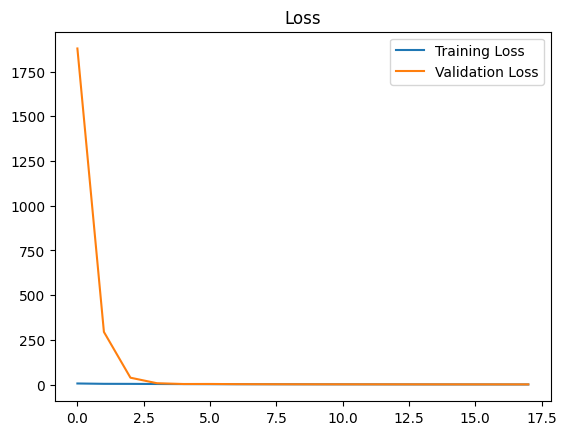

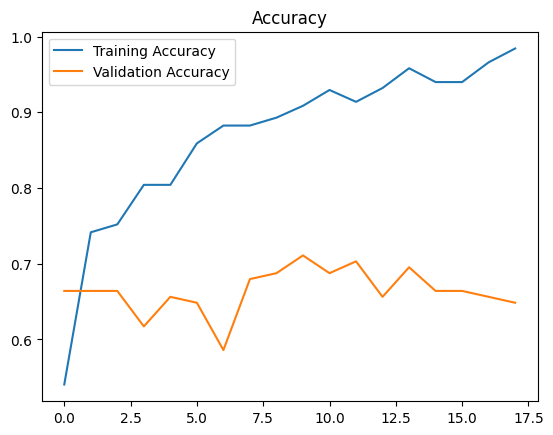

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
accuracy = 0.59
f1 score = 0.71


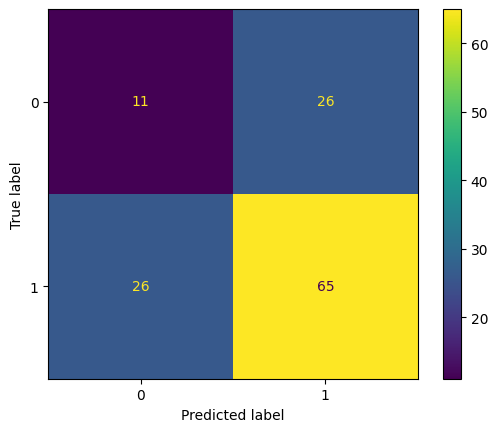

(0.59375, np.float64(0.7142857142857143))

In [6]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-3)
es = EarlyStopping(monitor='val_loss', patience=3)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.8)
m2 = get_CNN_model(optimizer, l2_reg=0.01)
train(m2, X_train, X_test, y_train, y_test, epochs=18,
      verbose=True,
      callbacks = [lr_scheduler, es],
      validation_split=0.25)

In [7]:
# compare 'my model' with VGG - see if depth matter
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(include_top=False, input_shape=IMG_SIZE + (3,))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Data shapes: (511, 240, 240, 3), (511, 1)


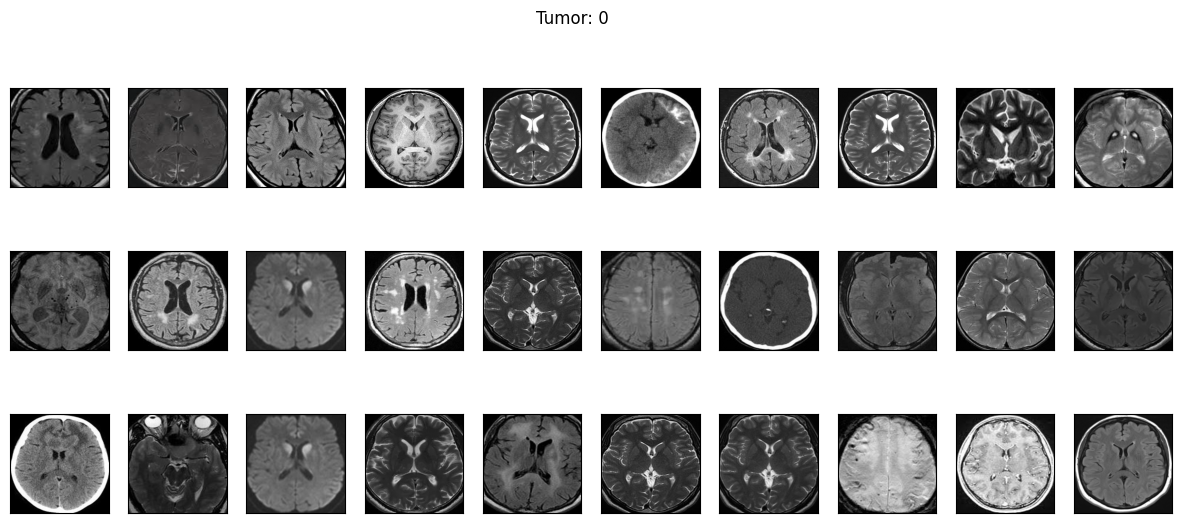

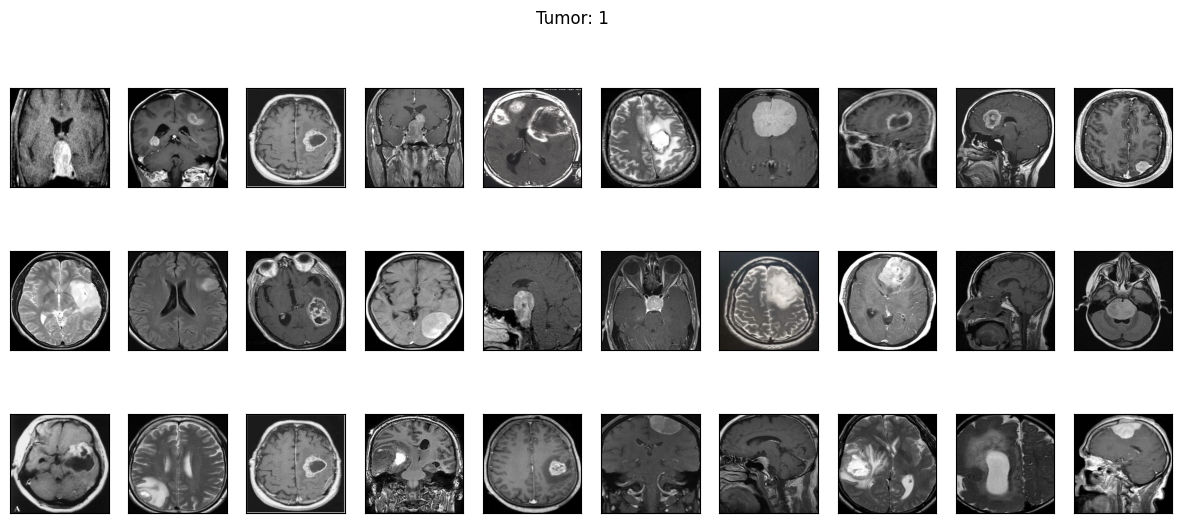

Model info:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Fitting the model...
Epoch 1/18


2025-01-05 16:14:32.116072: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,128,120,120]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,120,120]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-01-05 16:14:32.150052: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.034039818s
Trying algorithm eng0{} for conv (f32[32,128,120,120]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,120,120]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", b

12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5786 - loss: 0.8731 - val_accuracy: 0.6875 - val_loss: 0.4925 - learning_rate: 0.0010
Epoch 2/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8361 - loss: 0.3576 - val_accuracy: 0.7422 - val_loss: 0.4557 - learning_rate: 0.0010
Epoch 3/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.8934 - loss: 0.2850 - val_accuracy: 0.8359 - val_loss: 0.3610 - learning_rate: 0.0010
Epoch 4/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9242 - loss: 0.1973 - val_accuracy: 0.8672 - val_loss: 0.3311 - learning_rate: 0.0010
Epoch 5/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9344 - loss: 0.1795 - val_accuracy: 0.8438 - val_loss: 0.3512 - learning_rate: 0.0010
Epoch 6/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9425 - loss: 0.1601 - val_accuracy: 0.8594 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 7/18
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9703 - loss: 0.1249 - val_accuracy:

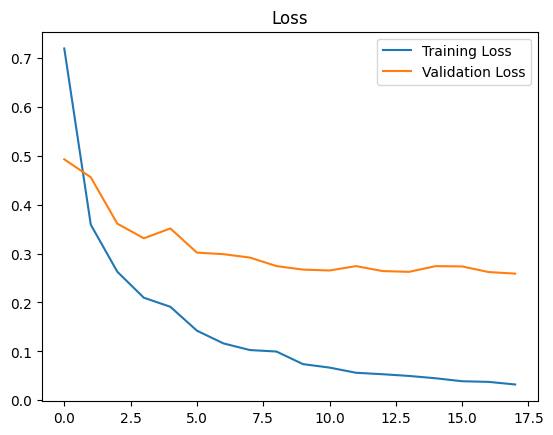

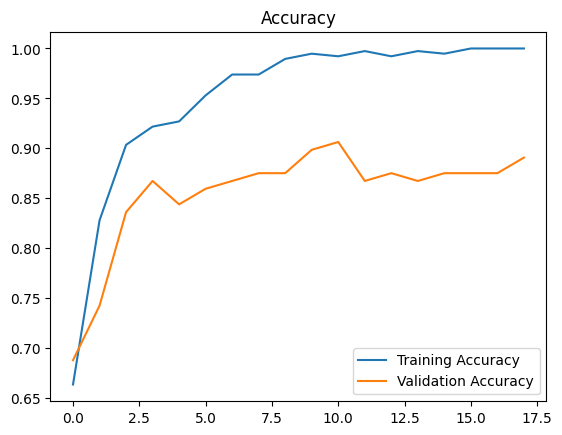

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
accuracy = 0.85
f1 score = 0.90


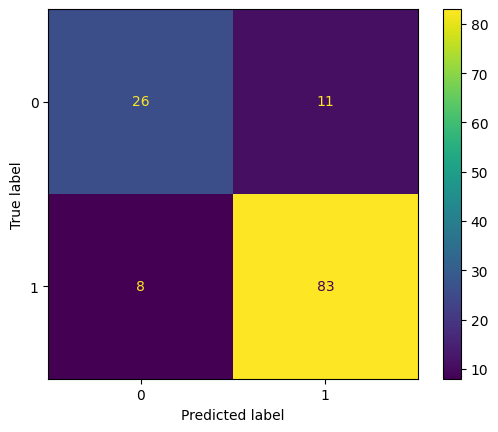

(0.8515625, np.float64(0.8972972972972973))

In [8]:
train(model, X_train, X_test, y_train, y_test, epochs=18,
      verbose=True,
      callbacks = [lr_scheduler, es],
      validation_split=0.25)

In [ ]:
# BENCHMARKS:

# f1 score
# m1 => 0.7
# m2 => 0.71
# vgg => 0.90